Data Source : https://www.kaggle.com/datasets/abhishekdave9/digital-habits-vs-mental-health-dataset

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv("digital_habits_vs_mental_health.csv")
print(df.shape)
print(df.columns)

(100000, 6)
Index(['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
       'sleep_hours', 'stress_level', 'mood_score'],
      dtype='object')


In [51]:
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [53]:
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.003505,2.997820,2.401433,6.988489,6.179590,9.06076
std,1.987073,1.414452,1.079111,1.466330,2.045409,1.27847
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.00000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.00000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.00000
75%,7.300000,4.000000,3.100000,8.000000,8.000000,10.00000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.00000



### Create features and trarget variables 

In [54]:
sel_features = ['screen_time_hours', 'social_media_platforms_used', 'sleep_hours', 'stress_level']
X = df[sel_features].values
y = df["mood_score"].values

print(X.shape, y.shape)
print(type(X), type(y))

(100000, 4) (100000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Data Splitting

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(70000, 4) (30000, 4)


### Use scikit-learn pipeline

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree=3, include_bias=False)),
         ('reg', LinearRegression())]

parameters = {'poly__degree': [2, 3, 4, 5, 6,7,8,9]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(pipeline, parameters, 
                         cv=5, scoring='neg_mean_squared_error', verbose=True)

poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error', verbose=True)

In [57]:
best_parameters = poly_grid.best_params_
print("Best parameters:", best_parameters)

Best parameters: {'poly__degree': 4}


### Perform the predictions 

In [58]:
#predict mood score for the training set
ytrain_pred = poly_grid.predict(X_train)

#predict mood score for the test set
ytest_pred = poly_grid.predict(X_test)

df_train_results = pd.DataFrame({'Actual': y_train, 'Predicted': np.round(ytrain_pred)})
df_train_results.head(10)

,Actual,Predicted
0,9,10.0
1,10,10.0
2,8,8.0
3,10,10.0
4,10,10.0
5,10,9.0
6,7,8.0
7,10,10.0
8,10,10.0
9,8,9.0


### Visualize the results 

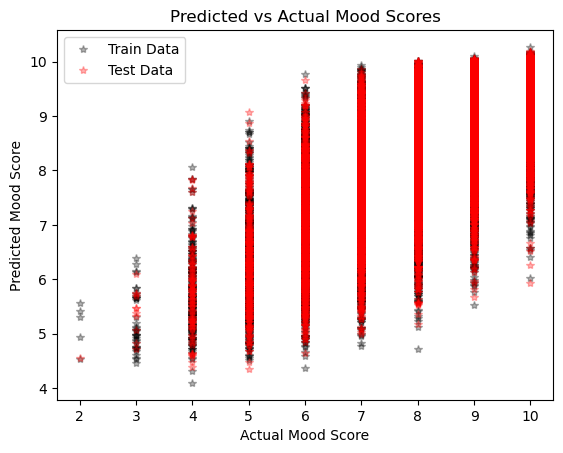

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train, ytrain_pred,'k*', label='Train Data', alpha=0.3)
plt.plot( y_test, ytest_pred, 'r*', label='Test Data', alpha=0.3)

plt.title("Predicted vs Actual Mood Scores")
plt.xlabel("Actual Mood Score") 
plt.ylabel("Predicted Mood Score")  
plt.legend()
plt.show()

### Model Evaluation 

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#evaluate on the training set
train_mae = mean_absolute_error(y_train, ytrain_pred)
print("Mean Absolute Error:", train_mae)

train_mse = mean_squared_error(y_train, ytrain_pred)
print("Mean Squared Error:", train_mse)

train_r2score = r2_score(y_train, ytrain_pred)
print("R^2 Score:", train_r2score)


# evaluation on the test set
test_mae = mean_absolute_error(y_test, ytest_pred)

print("Test Mean Absolute Error:", test_mae)

test_mse = mean_squared_error(y_test, ytest_pred)
print("Test Mean Squared Error:", test_mse)

test_r2score = r2_score(y_test, ytest_pred)
print("Test R^2 Score:", test_r2score)


Mean Absolute Error: 0.5212469086498205
Mean Squared Error: 0.5687395990915042
R^2 Score: 0.6525825462465504
Test Mean Absolute Error: 0.5227397570425978
Test Mean Squared Error: 0.5745224885478565
Test R^2 Score: 0.6471950521673215
